In [1]:
import numpy as np 
import pandas as pd 
import os
import glob
import cv2
import random
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation
from keras.models import Model, Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.utils import np_utils
from keras import backend as K

print(os.listdir("cell_images"))
np.random.seed(1)

Using TensorFlow backend.


['Parasitized', 'Uninfected']


In [2]:
PATH = "cell_images"
os.listdir(PATH)

['Parasitized', 'Uninfected']

In [3]:
# all image path of parasitized
paths_para=glob.glob(os.path.join(PATH,'Parasitized','*.png'))
paths_uninf=glob.glob(os.path.join(PATH,'Uninfected','*.png'))
len(paths_para), len(paths_uninf)

(13779, 13779)

In [4]:
# show one
path=paths_para[0]
img=cv2.imread(path) # cv2 stores image in BGR format
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # transforming to RGB format
img.shape

(148, 142, 3)

https://github.com/keras-team/keras/issues/11208

In [6]:
# helper to get images
def get_data(path, resize_dim=299):
    img=cv2.imread(path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    #img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
    #img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    
    img_rz=cv2.resize(img,(resize_dim,resize_dim),interpolation=cv2.INTER_AREA)
    return img_rz

In [7]:
parasite_images=np.array([get_data(path) for path in paths_para])
parasite_images.shape

(13779, 299, 299, 3)

In [8]:
uninf_images=np.array([get_data(path) for path in paths_uninf])
uninf_images.shape

(13779, 299, 299, 3)

In [9]:
para_label = np.array([1 for _ in range(len(parasite_images))])
uninf_label = np.array([0 for _ in range(len(uninf_images))])

para_label.shape, uninf_label.shape

((13779,), (13779,))

In [10]:
x_all = np.concatenate((parasite_images, uninf_images), axis=0)
y_all = np.concatenate((para_label, uninf_label), axis=0)
print(x_all.shape, y_all.shape)

(27558, 299, 299, 3) (27558,)


Index number: 8831
Label: 1


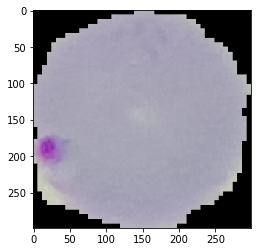

In [11]:
idx = random.randint(0, len(x_all))
print("Index number: {}".format(idx))
print("Label: {}".format(y_all[idx]))
plt.imshow(x_all[idx])

In [12]:
print(x_all.shape, y_all.shape)

(27558, 299, 299, 3) (27558,)


In [17]:
x_train, x_dev, y_train, y_dev = train_test_split(x_all, y_all, test_size=0.2, random_state=1)
print(x_train.shape, x_dev.shape, y_train.shape, y_dev.shape)

(22046, 299, 299, 3) (5512, 299, 299, 3) (22046,) (5512,)


In [13]:
# only train and test set
np.save("x_train_200_no_val.npy", x_train)
np.save("y_train_200_no_val.npy", y_train)

np.save("x_test_200_no_val.npy", x_test)
np.save("y_test_200_no_val.npy", y_test)

In [12]:
# save whole data
np.save("x_all_200.npy", x_all)
np.save("y_all_200.npy", y_all)

In [13]:
indices=list(range(len(x_all)))
np.random.seed(42)
np.random.shuffle(indices)

ind=int(len(indices)*0.80)

# train data
x_train=x_all[indices[:ind]] 
y_train=y_all[indices[:ind]]

# dev set (validation and test)
x_dev=x_all[indices[-(len(indices)-ind):]] 
y_dev=y_all[indices[-(len(indices)-ind):]]

In [14]:
print(x_train.shape, y_train.shape)
print(x_dev.shape, y_dev.shape)

(22046, 200, 200, 3) (22046,)
(5512, 200, 200, 3) (5512,)


In [18]:
x_val, x_test, y_val, y_test = train_test_split(x_dev, y_dev, test_size=0.5, random_state=1)
print(x_val.shape, x_test.shape, y_val.shape, y_test.shape)

(2756, 299, 299, 3) (2756, 299, 299, 3) (2756,) (2756,)


In [19]:
# one hot encoded vectors
num_classes = 2

y_train = np_utils.to_categorical(y_train,num_classes)
y_val = np_utils.to_categorical(y_val,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)
print(y_train.shape, y_val.shape, y_test.shape)

(22046, 2) (2756, 2) (2756, 2)


In [20]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((22046, 299, 299, 3), (22046, 2), (2756, 299, 299, 3), (2756, 2))

In [21]:
x_test.shape, y_test.shape

((2756, 299, 299, 3), (2756, 2))

In [22]:
np.save("x_train_299.npy", x_train)
np.save("y_train_299.npy", y_train)

np.save("x_val_299.npy", x_val)
np.save("y_val_299.npy", y_val)

np.save("x_test_299.npy", x_test)
np.save("y_test_299.npy", y_test)

In [ ]:
print("Done!")